# **Welcome**

We are starting our journey analysing data on Google Cloud. Excited? Hope you enjoy this project as I did.

Never done a big data analytics project? Never done an analytics project on Cloud? Have no ideas at all? Don't worry. I will go through every details with you and take you experience the power of Cloud and Big Data.

Let's do it!

## **1. Introduction**

We cannot start analytics project without data. Of course we need to collect and gather some data we need. Usually we take data from enterprise system or database. In the company, it is common that there is a data team (more specifically a ETL team) helping us extracting data from system and business database and preparing data for analytics purpose.

In this case, we do not have access to business systems or business database. We will collect and store our own data, and then we process and analyse data.

## **2. Business understanding**

But how do we know what data we need? Remember the data analytics lifecycle? It always starts with **business understanding**. This requires us understand the business context and requirements of the stakeholder.

Assume that you are hired by one AR gaming company. They have launched an AR game called ***MonsterQuest***. This game is very similar to [***Pokémon GO***](https://www.youtube.com/watch?v=2sj2iQyBTQs), where players can catch, battle, and train these creatures (Pokémon) at real-world locations.

Recently the company noticed a decline in player engagement six months post-launch of ***MonsterQuest***. The main feedback from players is that the game becomes repetitive, and the distribution of **monsters (Pokémon)** seems random, affecting player satisfaction and retention. The company wants to leverage data analytics to improve player engagement.


***So, what is the issue? And what data we need to analyse to solve the issue?***

By analysing the business case, we know the company did not really explore the difference between monsters (Pokémon) and they just place the monsters (Pokémon) in a random way, so sometimes the users might keep seeing similar monsters (Pokémon) and then they feel bored.

Thus, if we need to utilise data to better understand the features and abilities of monsters (Pokémon) to optimise the placement of monsters with better strategy instead of random placement. With better placement, the users can have more new experience and would stay with the game.

The potential data would be -

 - the types of pokemons
 - the basic information of pokemons
 - the abilities of pokemons

For example, [Psyduck](https://bulbapedia.bulbagarden.net/wiki/Psyduck_(Pok%C3%A9mon)) and [Pikachu](https://bulbapedia.bulbagarden.net/wiki/Pikachu_(Pok%C3%A9mon)) have the same levelling rate but with different shape and abilities and types.

Our target would be understanding the main features of the pokemons and then try to group them based on similarity of multiple attributes (stats), so that we know how to distribute different pokemons more strategically.

## **3. Data gathering**

Through looking closely into the business case, now we understand what our stakeholders are expecting from this project. Next we will sort out the data collection.



### Data source

We need to better understand the monsters (pokemons) and need to place them with more intentions based on the understanding of the monsters (pokemons).

Luckily, there is a public API called [PokeAPI](https://pokeapi.co/docs/v2) which provides all kinds of data about pokemons.

Before collecting data, we need to understand the API endpoints by checking their documentation. First, visit https://pokeapi.co/docs/v2 to check the API documentation. In this API, there are 10 main enpoint groups:


*   [Berries](https://pokeapi.co/docs/v2#berries-section)
*   [Contests](https://pokeapi.co/docs/v2#contests-section)
*   [Encounters](https://pokeapi.co/docs/v2#encounters-section)
*   [Evolution](https://pokeapi.co/docs/v2#evolution-section)
*   [Games](https://pokeapi.co/docs/v2#games-section)
*   [Items](https://pokeapi.co/docs/v2#items-section)
*   [Locations](https://pokeapi.co/docs/v2#locations-section)
*   [Machines](https://pokeapi.co/docs/v2#machines-section)
*   [Moves](https://pokeapi.co/docs/v2#moves-section)
*   [Pokémon](https://pokeapi.co/docs/v2#pokemon-section)

***Which endpoint group would be the most useful one for us given the business objective?***

Since we need Pokemon data, [Pokémon](https://pokeapi.co/docs/v2#pokemon-section) would be the main enpoint group we would use to collect data. In this enpoint group, there are various endpoints:


*   [Abilities](https://pokeapi.co/docs/v2#abilities)
*   [Characteristics](https://pokeapi.co/docs/v2#characteristics)
*   [Egg Groups](https://pokeapi.co/docs/v2#egg-groups)
*   [Genders](https://pokeapi.co/docs/v2#genders)
*   [Growth Rates](https://pokeapi.co/docs/v2#growth-rates)
*   [Natures](https://pokeapi.co/docs/v2#natures)
*   [Pokeathlon Stats](https://pokeapi.co/docs/v2#pokeathlon-stats)
*   [Pokemon](https://pokeapi.co/docs/v2#pokemon)
*   [Pokemon Location Areas](https://pokeapi.co/docs/v2#pokemon-location-areas)
*   [Pokemon Colors](https://pokeapi.co/docs/v2#pokemon-colors)
*   [Pokemon Forms](https://pokeapi.co/docs/v2#pokemon-forms)
*   [Pokemon Habitats](https://pokeapi.co/docs/v2#pokemon-habitats)
*   [Pokemon Shapes](https://pokeapi.co/docs/v2#pokemon-shapes)
*   [Pokemon Species](https://pokeapi.co/docs/v2#pokemon-species)
*   [Stats](https://pokeapi.co/docs/v2#stats)
*   [Types](https://pokeapi.co/docs/v2#types)

Ideally, we should integrate data from different perspectives through these enpoints, such as location, abilities, egg groups, stats, types. However, given this is the first exploration. We will run a pilot project first to see how it goes. In the future, we could consider expand the data source and data amount to further improve the analytics capability.

In this pilot project, we will use [Pokemon](https://pokeapi.co/docs/v2#pokemon) enpoint. The enpoint is `GET` [https://pokeapi.co/api/v2/pokemon/{id or name}/]().

Through this endpoint, the data we can get is as shown below:![picture](https://drive.google.com/uc?id=186cEn7suUgjOHmZf82YJVE4AN5_iVYhh)

This looks pretty good. We can get stats, type, and some basic information of the pokemons. Next we will find a way to get all these pokemon information at scale. If we pay attention to the endpoint, we would see we can input id or name to get the pokemon information. If we need multiple pokemon information, we can just create a list of id or names and then write a for loop to make multiple requests to get the data. The pokemon id in this API are just integers starting from 1. And there are 1025 pokemons in total.

Thus, the easiest way for us to get all pokemon data at once through [Pokemon](https://pokeapi.co/docs/v2#pokemon) enpoint is we loop the integers from 1 to 1025 using `range()` as pokemon id and then add the id to the pokemon endopoint to make request to retrieve data.

Here is the codes and explanation of codes:


```
base_url = "https://pokeapi.co/api/v2/" # This is the base url of pokeapi
num_pokemon = 1025 # We set the number of pokemon data we want to collect

# Then we create an empty list to store the pokemon data we retrieve through API
pokemon_data = []

# The following is the "for loop" we use to make multiple requests with different urls.
# range(1, num_pokemon +1) is used to loop from 1 to 1026, so we will get 1025 pokemons in the end.
# url = f"{base_url}pokemon/{i}" is used to create the endpoints with different id.
# We use f format to call the base url and each pokemon id.
# requests library is used to make request.
# to better tackle with requests errors, we create conditional statements to tell us whether the reponse is successful or not (200 is successful reponse code).
# If it is successful, we will get all the pokemon data in this endpoint and store it into the empty list we created. If it fails to retrieve data, we print out the message.


for i in range(1, num_pokemon + 1):
    url = f"{base_url}pokemon/{i}"
    response = requests.get(url)
    
    if response.status_code == 200:
        pokemon = response.json()
        pokemon_data.append(pokemon)
    else:
        print(f"Failed to retrieve data for Pokemon ID: {i}")
```

In [10]:
import requests
import time

# Extract data from the PokeAPI
base_url = "https://pokeapi.co/api/v2/"
num_pokemon = 1025

pokemon_data = []

for i in range(1, num_pokemon + 1):
    url = f"{base_url}pokemon/{i}"

    response = requests.get(url)

    if response.status_code == 200:
        pokemon = response.json()
        pokemon_data.append(pokemon)
    else:
        print(f"Failed to retrieve data for Pokemon ID: {i}")

Here we test whether our data is as we expect.



```
len(pokemon_data) # This is to get the length of data, so we know how many pokemon data we retrieve
pokemon_data[0] # This is to check the data we get using one example.
list(pokemon_data[0].keys()) # This is to get all the fields we retrieve from the endpoint.
```



In [11]:
len(pokemon_data)

1025

In [12]:
pokemon_data[0]

{'abilities': [{'ability': {'name': 'overgrow',
    'url': 'https://pokeapi.co/api/v2/ability/65/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'chlorophyll',
    'url': 'https://pokeapi.co/api/v2/ability/34/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 64,
 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/1.ogg',
  'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/1.ogg'},
 'forms': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'}],
 'game_indices': [{'game_index': 153,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 153,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 153,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 1,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/versio

In [13]:
list(pokemon_data[0].keys())

['abilities',
 'base_experience',
 'cries',
 'forms',
 'game_indices',
 'height',
 'held_items',
 'id',
 'is_default',
 'location_area_encounters',
 'moves',
 'name',
 'order',
 'past_abilities',
 'past_types',
 'species',
 'sprites',
 'stats',
 'types',
 'weight']

In [14]:
pokemon_data[0]['name']

'bulbasaur'

In [15]:
pokemon_data[0]['stats']

[{'base_stat': 45,
  'effort': 0,
  'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}},
 {'base_stat': 49,
  'effort': 0,
  'stat': {'name': 'attack', 'url': 'https://pokeapi.co/api/v2/stat/2/'}},
 {'base_stat': 49,
  'effort': 0,
  'stat': {'name': 'defense', 'url': 'https://pokeapi.co/api/v2/stat/3/'}},
 {'base_stat': 65,
  'effort': 1,
  'stat': {'name': 'special-attack',
   'url': 'https://pokeapi.co/api/v2/stat/4/'}},
 {'base_stat': 65,
  'effort': 0,
  'stat': {'name': 'special-defense',
   'url': 'https://pokeapi.co/api/v2/stat/5/'}},
 {'base_stat': 45,
  'effort': 0,
  'stat': {'name': 'speed', 'url': 'https://pokeapi.co/api/v2/stat/6/'}}]

## **4. Data ingestion & Data storage**

Now that we get all the data, we can consider store it somewhere. Given it contains lots of information and we are not sure how we will use the data yet, we can load the data into cloud. And then we can get the data whenever we want without making requests to the API again to get the data. Regarding the data format is json file instead of simple tabular data, the easy way is to load the data somewhere without any transformation. And then we will send the data to the data warehouse, where we can query data and do analysis.

Here are the steps we ingest and load data:


1.   Use `Google Cloud Storage` to load the original data we collect from API.
2.   Then transform the data into a suitable format and load it from `Google Cloud Storage` to `Google BigQuery` (data warehouse).

Both `Google Cloud Storage` and `BigQuery` provide REST API to access the service remotely. In this project, we will call the API to load the data and query/analyse data. Below is the analytics pipeline we are following for this project:

![picture](https://drive.google.com/uc?id=1BeSZoOpKwZ1YPSUQnuZztFbEyhlCW2Kl)

### 4.1 Create a project in Google Cloud

We are managing all resources within one project. Before we load data into Cloud Storage and BigQuery, we need to set up a project first. You could use the existing project, but here we recommend you to create a new project. Once you create the project, you need to save the **project id**, which we will use later.

![picture](https://drive.google.com/uc?id=18bayQbOjHw8Uq-QkMwYhupi8FPtT9Dmm)


In [16]:
project_id = "andy-458215" # Replace "your-project-id" with your project id

### 4.2 Enable APIs in Google Cloud

**Before we start, we need to make sure we have enable APIs.**

Visit API library in Google Cloud, search for "BigQuery" and "Cloud Storage".

![picture](https://drive.google.com/uc?id=1gB7wyX2QI3Cx7Ji1vKGznpVJeqTvX5OP)



Then make sure you have enabled the API. If not, just click "Enable" to enabale the APIs. Please enable both BigQuery and Cloud storage API. Below is the example of BigQuery API:

![picture](https://drive.google.com/uc?id=1RPjJ6nKEMZsrJ9pI92ogH8NDwhJZNKz5)



### 4.3 Install libraries/packages

In order to call API in Google Colab, we need to first install `google-cloud-storage` and `google-cloud-bigquery`

In [2]:
!pip install requests google-cloud-storage google-cloud-bigquery

### 4.4 Authentication

To connect with API and interact with Google Cloud Storage and Google BigQuery, we need to get authentication. In Google colab, we can run the below codes to grant the access directly. Once we run the code, we will be redirected to another page where we are asked whether we allow this notebook to access your Google credentials. You need to make sure you are using the same google account for both Google Colab and Google Cloud. Or the anuthentication might fail.



```
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()
```



![picture](https://drive.google.com/uc?id=1cpZXQ6zGwaUPHNjZNgkGNWLqVjkr3IJw)

![picture](https://drive.google.com/uc?id=1FGTDlBn9KzYe-Wo04pHbY9V_8X0CvxN-)

![picture](https://drive.google.com/uc?id=1JVdROtj2DaSYomkhvwV727niecFioVts)

![picture](https://drive.google.com/uc?id=1ZU00mPK1eaAWBAUnw_VQ5teAbWOOx1fh)

![picture](https://drive.google.com/uc?id=1a3sRpjQM7yhGnLkJiZ4R404PM1hXELNu)





In [17]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

Optionally, you can set up a service account and then download the key file and upload key file to google colab, and then call the key file using the below code.

```
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "key_file"
```


### 4.5 Import libraries

Once we gain the API credentials, we will need to import the libraries. Since the data we retrieve from API is json data format, we will import `json` library as well to be able to deal with json data.

In [18]:
# Import required libraries
import json
from google.cloud import storage
from google.cloud import bigquery

### 4.6 Create bucket in Google Cloud Storage

Before we load data into Cloud Storage, we need to create a bucket. We can log into the Google Cloud Console and then go to Cloud Storage page and create bucket manually. In this case, we will use API to create bucket directly.

Here we create a function called `create_bucket`:



```
storage_client = storage.Client(project=project_id) # This is to set up credentials
bucket = storage_client.bucket(bucket_name) # This is to set up the bucket name
new_bucket = storage_client.create_bucket(bucket, location="US")
# This is to create bucket and set up region
# "US" means multi-region in the US, you can also set "EU" or "ASIA" for multi-region in the Europe and Asia
```




In [23]:
def create_bucket(bucket_name, project_id):
    """Create a new bucket in specific location with storage class"""
    storage_client = storage.Client(project=project_id)
    bucket = storage_client.bucket(bucket_name)
    new_bucket = storage_client.create_bucket(bucket, location="US")  # You can change the location

    print(f"Bucket {new_bucket.name} created.")

# Replace 'your-bucket-name' with your desired bucket name
create_bucket('andy_pokemen', project_id)

Bucket andy_pokemen created.


### 4.7 Load the API data into Cloud Storage

Now everything is set up, we can start loading data into Cloud Storage. We need to tell the bucket name, you can just input the bucket you just created in the previous step. And then we need to point the data we are loading. Here `blob` is an object which refers to unstructured data files stored in cloud-based storage services. Remember the list where we store the API data? And the retrieved data is json (though stored in a list), so we will just call it "pokemon_data.json".



```
# These codes are calling API and define the bucket and the data file

storage_client = storage.Client()
bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(blob_name)
```



```
# Because earlier we store the data into the list, it is not a standard format of json.
# Here we transform the data into newline-delimited json file.

json_data = "\n".join(json.dumps(pokemon) for pokemon in pokemon_data)
```



In [24]:
# Store the extracted data in Google Cloud Storage
# Replace 'your-bucket-name' with your bucket name
bucket_name = "andy_pokemen"
blob_name = "pokemon_data.json" # you change the object name if you want

storage_client = storage.Client()
bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(blob_name)

# Convert the Pokemon data list to newline-delimited JSON
json_data = "\n".join(json.dumps(pokemon) for pokemon in pokemon_data)

blob.upload_from_string(json_data)

print(f"Data uploaded to Google Cloud Storage: gs://{bucket_name}/{blob_name}")

Data uploaded to Google Cloud Storage: gs://andy_pokemen/pokemon_data.json


Here we can see the data has been loaded into Cloud Storage and the uri is `gs://pokemon-test/pokemon_data.json`. This uri will be used to call the data. We can also visit Google Cloud Console to check the data and download the data.

### 4.8 Create a dataset in Google BigQuery

We need to know where to load the data in BigQuery. Of course we can use the existing dataset, just go to the console and copy the dataset name. Here we will create a new dataset to store the data we want. To create a new dataset, we write a function to make connection to BigQuery API, set up dataset info and then create dataset.



```
# Initializes a BigQuery client
client = bigquery.Client(project=project_id)

```


```
# Constructs a dataset reference and the dataset object
# Sets the location for the dataset (optional but recommended)

dataset_ref = bigquery.DatasetReference(project_id, dataset_id)
dataset = bigquery.Dataset(dataset_ref)
dataset.location = location
```


```
# Creates the dataset in your specified project

created_dataset = client.create_dataset(dataset, timeout=30)
```

In [26]:
def create_dataset(project_id, dataset_id, location="US"):
    client = bigquery.Client(project=project_id)
    dataset_ref = bigquery.DatasetReference(project_id, dataset_id)
    dataset = bigquery.Dataset(dataset_ref)
    dataset.location = location

    created_dataset = client.create_dataset(dataset, timeout=30)  # Waits 30 seconds
    print("Dataset {} created.".format(created_dataset.dataset_id))

# Usage
create_dataset(project_id, 'andy_pokemen_dataset') # Replace 'your-new-datatset-name' with your desired dataset name

Dataset andy_pokemen_dataset created.


### 4.9 Load the data from Cloud Storage to BigQuery

Ho! Finally we are loading data to BigQuery, the last step before analysis!

Here we define the project and dataset where we are loading data to. And we create a table to store our pokemon data.

The below is the explanation for the codes:



```
# Initializes a BigQuery client

bigquery_client = bigquery.Client(project=project_id)
```


```
# Constructs a dataset reference
# Construct a reference to a specific table within the dataset

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)
```



```
# This is to configure our data loading.
# Here we use autodetect to detect the schema automatically
# And define tell the data we are loading is newline-delimited json file

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.NEWLINE_DELIMITED_JSON
```



```
# Here we load the data from Cloud storage and store it into the table we set up
# The load_job.result() method is used to wait for the load job to complete and to check the final status of the job.

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()
```

In [27]:
# Load the data into BigQuery
# project_id = "your project id"
# Replace 'your-dataset-name' with your dataset name
dataset_name = "andy_pokemen_dataset"
table_name = "pokemon_data" # you can change the name if you want

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.NEWLINE_DELIMITED_JSON

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: andy-458215.andy_pokemen_dataset.pokemon_data


### 4.10 Fetch table and check the schema

Once we load the data to table in BigQuery, we need to check our table. Here we use API to fetch table and print the schema of the table. This will be useful for us to better understand the data.

In [28]:
# API Request: Fetch the table
table = bigquery_client.get_table(table_ref)

# Print the schema
for schema_field in table.schema:
    print(f'Field: {schema_field.name}, Type: {schema_field.field_type}, Mode: {schema_field.mode}')

Field: weight, Type: INTEGER, Mode: NULLABLE
Field: types, Type: RECORD, Mode: REPEATED
Field: stats, Type: RECORD, Mode: REPEATED
Field: sprites, Type: RECORD, Mode: NULLABLE
Field: species, Type: RECORD, Mode: NULLABLE
Field: past_abilities, Type: RECORD, Mode: REPEATED
Field: name, Type: STRING, Mode: NULLABLE
Field: order, Type: INTEGER, Mode: NULLABLE
Field: moves, Type: RECORD, Mode: REPEATED
Field: id, Type: INTEGER, Mode: NULLABLE
Field: past_types, Type: RECORD, Mode: REPEATED
Field: held_items, Type: RECORD, Mode: REPEATED
Field: height, Type: INTEGER, Mode: NULLABLE
Field: game_indices, Type: RECORD, Mode: REPEATED
Field: base_experience, Type: INTEGER, Mode: NULLABLE
Field: forms, Type: RECORD, Mode: REPEATED
Field: abilities, Type: RECORD, Mode: REPEATED
Field: cries, Type: RECORD, Mode: NULLABLE
Field: location_area_encounters, Type: STRING, Mode: NULLABLE
Field: is_default, Type: BOOLEAN, Mode: NULLABLE


Here we see `Field`, `Type` and `Mode`.

**Field** is the field name;

**Type** is the format/data type of the field;

**Mode** is a description of the field. The below are the three common modes:


*   *Nullable* - Column allows NULL values (default)
*   *Required* - NULL values are not allowed
*   *Repeated* - Column contains an array of values of the specified type


Here we noticed some fileds like types and stats are **`RECORD`** type, that means this field has **nested fields**. And the nested fields are not shown in the returned schema, so we will write another program to get a schema with showing further level of fields, so we will understand better how we can query tyeps data and stats data.



In [29]:
# We use the following code to get all fields under the "RECORD" field.

def print_schema(fields, level=0):
  # Level is used for indentation to visually represent the nesting level of the fields.
  # It defaults to 0 for the top-level fields.
    for field in fields:
        print(" " * level * 2 + f"{field.name} ({field.field_type})")
        if field.field_type == 'RECORD':
            print_schema(field.fields, level + 1)

print_schema(table.schema)

weight (INTEGER)
types (RECORD)
  type (RECORD)
    url (STRING)
    name (STRING)
  slot (INTEGER)
stats (RECORD)
  stat (RECORD)
    url (STRING)
    name (STRING)
  effort (INTEGER)
  base_stat (INTEGER)
sprites (RECORD)
  versions (RECORD)
    generation-viii (RECORD)
      icons (RECORD)
        front_female (STRING)
        front_default (STRING)
    generation-vii (RECORD)
      ultra-sun-ultra-moon (RECORD)
        front_shiny_female (STRING)
        front_shiny (STRING)
        front_female (STRING)
        front_default (STRING)
      icons (RECORD)
        front_female (STRING)
        front_default (STRING)
    generation-vi (RECORD)
      x-y (RECORD)
        front_shiny_female (STRING)
        front_shiny (STRING)
        front_female (STRING)
        front_default (STRING)
      omegaruby-alphasapphire (RECORD)
        front_shiny_female (STRING)
        front_shiny (STRING)
        front_female (STRING)
        front_default (STRING)
    generation-ii (RECORD)
      sil

## **5. Data query**

Before data analysis, we need to select the data we need because the original data is mixed with relevant and irrelevant data. Once we get the data, we need some data pre-processing and make sure the data format is fitting our need of analysis.

In the company, often we need to query data before data analysis. It is common for data anlyst to query data from the data warehouse. In this case, our data is also stored in data warehouse - **BigQuery**, and we will try to get the data we want through query.

Before we start the query, we need to go through some SQL basics.

### 5.1 SQL basics

SQL (Structured Query Language) is a standard language for storing, manipulating, and retrieving data in relational databases. It is an essential skill for anyone working with data.


**Basic SQL Concepts:**

- Database: A collection of data stored in a structured format.

- Table: A structure that stores data in rows and columns.

- Column: A specific category of data within a table.

- Row: A single record or entry in a table.

Usually we need to create table using SQL before we do data query. But in this case, the database is the dataset we create in BigQuery; Table is the table where we load the data; And there are columns (fields) and rows. Thus, we will focus on data query using SQL.


To query data, we need to understand the basic syntax for query:


*   The `SELECT` statement: Querying data

    ```
    # Here shows how we retrieve the entire table using SELECT

    SELECT * FROM `project_id.dataset_name.table_name`;

    # We can also just retrieve specific column(s) using SELECT

    SELECT column1, column2 FROM `project_id.dataset_name table_name`;
    ```

*    The `WHERE` statement: Filtering data

    ```
    # Here we set conditions to query data

    SELECT * FROM `project_id.dataset_name.table_name`
    WHERE column2 > 25;
    ```
*   The `ORDER BY` statement: Sorting data

    ```
    # Here we set conditions to query data

    SELECT column1, column2
    FROM `project_id.dataset_name.table_name`
    ORDER BY column1 DESC, column2 ASC;
    ```
*   The `COUNT()`, `SUM()`, `AVG()`, `MIN()`, and `MAX()` statement: Aggregating data

    ```
    # Here we count the table and save it as a field called total_rows

    SELECT COUNT(*) AS total_rows FROM `project_id.dataset_name.table_name`;
    ```
*   The `GROUPBY` statement: Grouping data
    ```
    # Here we return column1 and sum value of column2 grouped by column1

    SELECT column1, SUM(column2) AS total
    FROM `project_id.dataset_name.table_name`
    GROUP BY column1;
    ```
*   The `JOIN` statement: Joining data
    ```
    # Here we join two tables from the database based on id

    SELECT *
    FROM `project_id.dataset_name.table1` t1
    JOIN `project_id.dataset_name.table2` t2
    ON t1.column_id = t2.column_id;

    # of course, we can also retrive different parts of data in one table and then join them.
    ```
*   The `LIMIT` statement: Retrieving only a specific number of rows
    ```
    # Here we only retrn 10 rows of data.

    SELECT * FROM `project_id.dataset_name.table_name`
    LIMIT 10;
    ```  

### 5.2 First query to test

First initialise the credidentials and make connection to the data (table) in BigQuery.

In [30]:
from google.cloud import bigquery

# project_id = "your project id"
# Replace 'your-dataset-name' with your dataset name
# Replace 'your-table-name' with your table name

dataset_name = "andy_pokemen_dataset"
table_name = "pokemon_data"

bigquery_client = bigquery.Client(project=project_id)

To make it easy, first let's try query all data with select * and we only get data of first 10 pokemons. Here are the steps:


- define the query with `query = f"""your SQL query"""` (the f string is just for reading the table info, so we do not need to copy paste the table every time)

- make the query with `bigquery_client.query(query)`.

- once the query is made, `query_job.result()` is used to get the data.

- since the data is written in rows, we use for loop to read each row.

In [31]:
# Query the data in BigQuery
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    LIMIT 10
"""

query_job = bigquery_client.query(query)
results = query_job.result()

print("Query Results:")
for row in results:
  print(row)

Output hidden; open in https://colab.research.google.com to view.

This is the schema of this table we have checked earlier. Thus, the above result is following this schema.

```
Field: weight, Type: INTEGER, Mode: NULLABLE
Field: types, Type: RECORD, Mode: REPEATED
Field: stats, Type: RECORD, Mode: REPEATED
Field: sprites, Type: RECORD, Mode: NULLABLE
Field: species, Type: RECORD, Mode: NULLABLE
Field: past_abilities, Type: RECORD, Mode: REPEATED
Field: name, Type: STRING, Mode: NULLABLE
Field: order, Type: INTEGER, Mode: NULLABLE
Field: moves, Type: RECORD, Mode: REPEATED
Field: id, Type: INTEGER, Mode: NULLABLE
Field: past_types, Type: RECORD, Mode: REPEATED
Field: held_items, Type: RECORD, Mode: REPEATED
Field: height, Type: INTEGER, Mode: NULLABLE
Field: game_indices, Type: RECORD, Mode: REPEATED
Field: base_experience, Type: INTEGER, Mode: NULLABLE
Field: forms, Type: RECORD, Mode: REPEATED
Field: abilities, Type: RECORD, Mode: REPEATED
Field: cries, Type: RECORD, Mode: NULLABLE
Field: location_area_encounters, Type: STRING, Mode: NULLABLE
Field: is_default, Type: BOOLEAN, Mode: NULLABLE
```

The query results is usually by rows, and in each row it shows (values of each field, {filed name: index}).

We can print data by name of the field or the index.


Below example is to make the same query but print the specific field by name of filed. We use `row['field_nam']`.

In [32]:
# Query the data in BigQuery
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    LIMIT 10
"""

query_job = bigquery_client.query(query)
results = query_job.result()

print("Query Results:")
for row in results:
  print(row['weight'])

Query Results:
326
110
115
600
1200
3600
112
315
152
402


Below example is to make the same query but print the specific field by index of filed. We use `row[index]`.

In [33]:
# Query the data in BigQuery
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    LIMIT 10
"""

query_job = bigquery_client.query(query)
results = query_job.result()

print("Query Results:")
for row in results:
  print(row[0])

Query Results:
326
110
115
600
1200
3600
112
315
152
402


You can load all the query data into dataframe using `query_job.to_dataframe()`, which might be easier for you to check the data.

In [34]:
query_job.to_dataframe()

,weight,types,stats,sprites,species,past_abilities,name,order,moves,id,past_types,held_items,height,game_indices,base_experience,forms,abilities,cries,location_area_encounters,is_default
0,326,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...,[{'generation': {'url': 'https://pokeapi.co/ap...,delcatty,404,[{'version_group_details': [{'version_group': ...,301,[],[{'version_details': [{'version': {'url': 'htt...,11,[{'version': {'url': 'https://pokeapi.co/api/v...,140,[{'url': 'https://pokeapi.co/api/v2/pokemon-fo...,"[{'is_hidden': False, 'slot': 1, 'ability': {'...",{'legacy': 'https://raw.githubusercontent.com/...,https://pokeapi.co/api/v2/pokemon/301/encounters,True
1,110,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...,[{'generation': {'url': 'https://pokeapi.co/ap...,sableye,405,[{'version_group_details': [{'version_group': ...,302,[],[{'version_details': [{'version': {'url': 'htt...,5,[{'version': {'url': 'https://pokeapi.co/api/v...,133,[{'url': 'https://pokeapi.co/api/v2/pokemon-fo...,"[{'is_hidden': False, 'slot': 1, 'ability': {'...",{'legacy': 'https://raw.githubusercontent.com/...,https://pokeapi.co/api/v2/pokemon/302/encounters,True
2,115,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...,[{'generation': {'url': 'https://pokeapi.co/ap...,mawile,407,[{'version_group_details': [{'version_group': ...,303,[{'types': [{'type': {'url': 'https://pokeapi....,[{'version_details': [{'version': {'url': 'htt...,6,[{'version': {'url': 'https://pokeapi.co/api/v...,133,[{'url': 'https://pokeapi.co/api/v2/pokemon-fo...,"[{'is_hidden': False, 'slot': 1, 'ability': {'...",{'legacy': 'https://raw.githubusercontent.com/...,https://pokeapi.co/api/v2/pokemon/303/encounters,True
3,600,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...,[{'generation': {'url': 'https://pokeapi.co/ap...,aron,409,[{'version_group_details': [{'version_group': ...,304,[],[{'version_details': [{'version': {'url': 'htt...,4,[{'version': {'url': 'https://pokeapi.co/api/v...,66,[{'url': 'https://pokeapi.co/api/v2/pokemon-fo...,"[{'is_hidden': False, 'slot': 1, 'ability': {'...",{'legacy': 'https://raw.githubusercontent.com/...,https://pokeapi.co/api/v2/pokemon/304/encounters,True
4,1200,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...,[{'generation': {'url': 'https://pokeapi.co/ap...,lairon,410,[{'version_group_details': [{'version_group': ...,305,[],[{'version_details': [{'version': {'url': 'htt...,9,[{'version': {'url': 'https://pokeapi.co/api/v...,151,[{'url': 'https://pokeapi.co/api/v2/pokemon-fo...,"[{'is_hidden': False, 'slot': 1, 'ability': {'...",{'legacy': 'https://raw.githubusercontent.com/...,https://pokeapi.co/api/v2/pokemon/305/encounters,True
5,3600,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...,[{'generation': {'url': 'https://pokeapi.co/ap...,aggron,411,[{'version_group_details': [{'version_group': ...,306,[],[{'version_details': [{'version': {'url': 'htt...,21,[{'version': {'url': 'https://pokeapi.co/api/v...,265,[{'url': 'https://pokeapi.co/api/v2/pokemon-fo...,"[{'is_hidden': False, 'slot': 1, 'ability': {'...",{'legacy': 'https://raw.githubusercontent.com/...,

Then you can interact with the dataframe to better understand the data if you want. It is the same as Pandas dataframe, so you can use the same syntax. Below are some examples.

In [35]:
query_job.to_dataframe()['stats'] # check stats column

,stats
0,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
1,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
2,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
3,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
4,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
5,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
6,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
7,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
8,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...
9,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...


In [36]:
query_job.to_dataframe().iloc[:,:5] # check the first 5 columns

,weight,types,stats,sprites,species
0,326,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
1,110,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
2,115,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
3,600,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
4,1200,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
5,3600,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
6,112,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
7,315,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
8,152,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...
9,402,[{'type': {'url': 'https://pokeapi.co/api/v2/t...,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...,{'versions': {'generation-viii': {'icons': {'f...,{'url': 'https://pokeapi.co/api/v2/pokemon-spe...


We have tested the query is working. Now is your return. Next are some quick exercise to test your understanding of SQL query in Big Query. Please check the requirement in text and then write your query.

#### Query 1: Extract the ids and names of first 10 pokemons.

#### Query 2: Extract the ids, names of pokemons that with weight over 5000 gram and order by descending weight

#### Query 3: Extract stats of Pikachu (pokemon name)

### 5.3 Query data for analysis

Now that we have stored data properly in the data warehouse and we have tested the query successfully, we will start collecting the data we need for analysis and solving the issues we mentioned earlier in the business analysis part.

The company clearly doesn't have very good understanding of pokemon characteristics and statistics. This is the main reason why they failed to place monsters with good diversity to give players good experience. We need to find out the right data and analyse the data for them.

Before that, we need to make sure we understand the data and its context first. Bulbagarden is a very good website to better understand the data and context. For example, through [this link](https://bulbapedia.bulbagarden.net/wiki/Pok%C3%A9mon_(species)) we can better understand pokemon. Here is the introduction to Pokemon from this website:

"There are currently 1025 known Pokémon species that inhabit the Pokémon world. They take up many shapes and sizes, resembling animals and living creatures in the real world. However, they possess several fantastic powers not demonstrated by most real animals, including the manipulation of aspects of the material world, such as electricity or fire, each having their own type and categories. It is implied that there are more Pokémon always waiting to be discovered beyond the current count."

This [link](https://bulbapedia.bulbagarden.net/wiki/Type) explains types of pokemon;

This [link](https://bulbapedia.bulbagarden.net/wiki/Stat) explains stats of pokemon.

Basically types (Japanese: タイプ Type) are properties applied to Pokémon and their moves, which affect the power of moves in battles. , while a stat (Japanese: 能力 ability) refers to any of several parameters pertaining to Pokémon that can affect turn order, move success, and damage output during a battle.

Except for types and stats, there are some other basic data, such weight, height that can be considered in this case as well.

Thus, in this analysis, we will analyse the key features of the pokemons, such as height, weight, stats, types. By combining descriptive analytics and machine learning modelling, we will aim to have better understanding of features and how features are corrected with each other.

Under such context, here are the potential data fields we are extracting from the data warehouse:


*   id
*   name
*   height
*   weight
*   types
*   stats (skills)

Before starting the query, we need to further check the data structure and understand how we should make the query.

We can query id, name, height, weight of pokemons directly. The we use for loop to read each row and define the fileds and print the data we retrieved.

In [37]:
# Query the data in BigQuery
query = f"""
    SELECT id, name, height, weight
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

print("Query Results:")
for row in results:
    print(f"ID: {row['id']}, Name: {row['name']}, Height: {row['height']}, Weight: {row['weight']}")

Query Results:
ID: 1, Name: bulbasaur, Height: 7, Weight: 69
ID: 2, Name: ivysaur, Height: 10, Weight: 130
ID: 3, Name: venusaur, Height: 20, Weight: 1000
ID: 4, Name: charmander, Height: 6, Weight: 85
ID: 5, Name: charmeleon, Height: 11, Weight: 190
ID: 6, Name: charizard, Height: 17, Weight: 905
ID: 7, Name: squirtle, Height: 5, Weight: 90
ID: 8, Name: wartortle, Height: 10, Weight: 225
ID: 9, Name: blastoise, Height: 16, Weight: 855
ID: 10, Name: caterpie, Height: 3, Weight: 29
ID: 11, Name: metapod, Height: 7, Weight: 99
ID: 12, Name: butterfree, Height: 11, Weight: 320
ID: 13, Name: weedle, Height: 3, Weight: 32
ID: 14, Name: kakuna, Height: 6, Weight: 100
ID: 15, Name: beedrill, Height: 10, Weight: 295
ID: 16, Name: pidgey, Height: 3, Weight: 18
ID: 17, Name: pidgeotto, Height: 11, Weight: 300
ID: 18, Name: pidgeot, Height: 15, Weight: 395
ID: 19, Name: rattata, Height: 3, Weight: 35
ID: 20, Name: raticate, Height: 7, Weight: 185
ID: 21, Name: spearow, Height: 3, Weight: 20
ID: 2

We can also put the retrieved data into dataframe using `query_job.to_dataframe()`

In [38]:
query_job.to_dataframe().head()

,id,name,height,weight
0,1,bulbasaur,7,69
1,2,ivysaur,10,130
2,3,venusaur,20,1000
3,4,charmander,6,85
4,5,charmeleon,11,190


Unlike `id, name, height, weight` which we can query directly, `types and stats` are nested fileds (as we have mentioned earlier) and should be queried in a different way.

```
id (INTEGER)
name (STRING)
height (INTEGER)
weight (INTEGER)
types (RECORD)
  type (RECORD)
    url (STRING)
    name (STRING)
  slot (INTEGER)
stats (RECORD)
  stat (RECORD)
    url (STRING)
    name (STRING)
  effort (INTEGER)
  base_stat (INTEGER)
```

Next we will explain how to query types and stats.

First, we can check types and see how should we query data. We use `SELECT types` to get all types data.

In [39]:
# Query to specifically look at the type structure
type_query = f"""
  SELECT name, types
  FROM `{project_id}.{dataset_name}.{table_name}`
  LIMIT 1
"""

query_job = bigquery_client.query(type_query)
results = query_job.result()

for row in results:
  print(row['name'])
  print(row['types'])

bulbasaur
[{'type': {'url': 'https://pokeapi.co/api/v2/type/12/', 'name': 'grass'}, 'slot': 1}, {'type': {'url': 'https://pokeapi.co/api/v2/type/4/', 'name': 'poison'}, 'slot': 2}]


In [40]:
query_job.to_dataframe()

,name,types
0,bulbasaur,[{'type': {'url': 'https://pokeapi.co/api/v2/t...


And then we found that one pokemon can be multiple types and each type has a name `types['type']['name']`. We can loop each type to check the name of each type.

In [41]:
# Query to specifically look at the type names
type_query = f"""
  SELECT name, types
  FROM `{project_id}.{dataset_name}.{table_name}`
  LIMIT 1
"""

query_job = bigquery_client.query(type_query)
results = query_job.result()

for row in results:
  print(row['name'])
  for type in row['types']:
    print(type['type']['name'])

bulbasaur
grass
poison


From above query, we know we can get name of each type with for loop. But we might want to agregate all type names into a list and group by name of pokemon. In this way, all information of one pokemon can be integrated into one row.

We can first use `UNNEST()` to explode types and then use `ARRAY_AGG()` to aggregate all data into a list. Then use `GROUP BY name` to make sure the types are aggregated for each pokemon.

The expected result in table will look like this:
```
name | types
-----|-----------------
name | [type_1, type_2]

```






In [42]:
# Query to specifically aggregate type names
type_nested_query = f"""
  SELECT
  name,
  ARRAY_AGG(DISTINCT t.type.name) AS types
  FROM `{project_id}.{dataset_name}.{table_name}`,
  UNNEST(types) AS t
  GROUP BY name
  LIMIT 1
"""

query_job = bigquery_client.query(type_nested_query)
results = query_job.result()

for row in results:
  print(row)


Row(('bulbasaur', ['grass', 'poison']), {'name': 0, 'types': 1})


In [43]:
query_job.to_dataframe()

,name,types
0,bulbasaur,"[grass, poison]"


Next, we will check the stats data and see how should we query data. We use `SELECT stats` to get all stats data.

In [44]:
# Query to specifically look at the stats structure
stats_query = f"""
  SELECT name, stats
  FROM `{project_id}.{dataset_name}.{table_name}`
  LIMIT 1
"""

query_job = bigquery_client.query(stats_query)
results = query_job.result()

for row in results:
  print(row['name'])
  print(row['stats'])

bulbasaur
[{'stat': {'url': 'https://pokeapi.co/api/v2/stat/1/', 'name': 'hp'}, 'effort': 0, 'base_stat': 45}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/2/', 'name': 'attack'}, 'effort': 0, 'base_stat': 49}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/3/', 'name': 'defense'}, 'effort': 0, 'base_stat': 49}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/4/', 'name': 'special-attack'}, 'effort': 1, 'base_stat': 65}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/5/', 'name': 'special-defense'}, 'effort': 0, 'base_stat': 65}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/6/', 'name': 'speed'}, 'effort': 0, 'base_stat': 45}]


In [45]:
query_job.to_dataframe()

,name,stats
0,bulbasaur,[{'stat': {'url': 'https://pokeapi.co/api/v2/s...


For stats data, it is quite different and it is more complex. We noticed that stat names are all in `stats['stat']['name']` and stat values are in `stats['base_stat']`. There are multiple stats items with stats values. Thus, our strategy is to convert the stats names as the column names and then populate the stats values to each column matching the stats names.

The expected result in table will look like this:

```
name | stat_1 | stat_2 | ...
-----|------- |--------|------
name | value  | value  | value

```

First, we need to know what stat names in the data so we know how to aggregate the value into names as columns.

In [46]:
# Query to specifically look at each stat
stats_query = f"""
  SELECT name, stats
  FROM `{project_id}.{dataset_name}.{table_name}`
  LIMIT 1
"""

query_job = bigquery_client.query(stats_query)
results = query_job.result()

for row in results:
  print(row['name'])
  for stat in row['stats']:
    print(stat)

bulbasaur
{'stat': {'url': 'https://pokeapi.co/api/v2/stat/1/', 'name': 'hp'}, 'effort': 0, 'base_stat': 45}
{'stat': {'url': 'https://pokeapi.co/api/v2/stat/2/', 'name': 'attack'}, 'effort': 0, 'base_stat': 49}
{'stat': {'url': 'https://pokeapi.co/api/v2/stat/3/', 'name': 'defense'}, 'effort': 0, 'base_stat': 49}
{'stat': {'url': 'https://pokeapi.co/api/v2/stat/4/', 'name': 'special-attack'}, 'effort': 1, 'base_stat': 65}
{'stat': {'url': 'https://pokeapi.co/api/v2/stat/5/', 'name': 'special-defense'}, 'effort': 0, 'base_stat': 65}
{'stat': {'url': 'https://pokeapi.co/api/v2/stat/6/', 'name': 'speed'}, 'effort': 0, 'base_stat': 45}


In [47]:
# Query to specifically look at only stat names and stat values
stats_query = f"""
  SELECT name, stats
  FROM `{project_id}.{dataset_name}.{table_name}`
  LIMIT 1
"""

query_job = bigquery_client.query(stats_query)
results = query_job.result()

for row in results:
    print(f"\nPokémon: {row.name}")
    print("Stats:")
    for stat in row.stats:
        print(stat['stat']['name'],stat['base_stat'])


Pokémon: bulbasaur
Stats:
hp 45
attack 49
defense 49
special-attack 65
special-defense 65
speed 45


Now we know we would need to create 6 columns with stat names:

- hp
- attack
- defense
- special-attack
- special-defense
- speed

First, we will explode stats field as we have done for types field. Then, we find the values using `stats.base_stat` by matching the names with `stats.stat.name`. We return them with specified names of stats.

In [48]:
# Query to populate stat names and stat valuesas to columns
stat_nested_query = f"""
SELECT
  name,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'hp') AS hp,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'attack') AS attack,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'defense') AS defense,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'special-attack') AS special_attack,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'special-defense') AS special_defense,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'speed') AS speed
FROM
  `{project_id}.{dataset_name}.{table_name}`
LIMIT 1
"""

query_job = bigquery_client.query(stat_nested_query)
results = query_job.result()

for row in results:
    print(row)

Row(('bulbasaur', 45, 49, 49, 65, 65, 45), {'name': 0, 'hp': 1, 'attack': 2, 'defense': 3, 'special_attack': 4, 'special_defense': 5, 'speed': 6})


In [49]:
query_job.to_dataframe()

,name,hp,attack,defense,special_attack,special_defense,speed
0,bulbasaur,45,49,49,65,65,45


Now, we can combine all queries into one single query and get all the data we want.

In [50]:
# Query to specifically aggregate all required data
all_query = f"""
SELECT
  id,
  name,
  weight,
  height,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'hp') AS hp,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'attack') AS attack,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'defense') AS defense,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'special-attack') AS special_attack,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'special-defense') AS special_defense,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'speed') AS speed,
  ARRAY_AGG(DISTINCT t.type.name) AS types
FROM
  `{project_id}.{dataset_name}.{table_name}`,
  UNNEST(types)AS t
GROUP BY
  id,
  name,
  stats,
  weight,
  height
LIMIT 1
"""

query_job = bigquery_client.query(all_query)
results = query_job.result()

for row in results:
    print(row)

Row((1, 'bulbasaur', 69, 7, 45, 49, 49, 65, 65, 45, ['grass', 'poison']), {'id': 0, 'name': 1, 'weight': 2, 'height': 3, 'hp': 4, 'attack': 5, 'defense': 6, 'special_attack': 7, 'special_defense': 8, 'speed': 9, 'types': 10})


Cool, we got the right data! Now we can remove `LIMIT 1` to get all data we have collected via API.

In [51]:
# Query to specifically aggregate all required data
all_query = f"""
SELECT
  id,
  name,
  weight,
  height,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'hp') AS hp,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'attack') AS attack,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'defense') AS defense,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'special-attack') AS special_attack,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'special-defense') AS special_defense,
  (SELECT s.base_stat FROM UNNEST(stats) as s WHERE s.stat.name = 'speed') AS speed,
  ARRAY_AGG(DISTINCT t.type.name) AS types
FROM
  `{project_id}.{dataset_name}.{table_name}`,
  UNNEST(types) AS t
GROUP BY
  id,
  name,
  stats,
  weight,
  height
"""

query_job = bigquery_client.query(all_query)
results = query_job.result()

for row in results:
    print(row)

Row((1, 'bulbasaur', 69, 7, 45, 49, 49, 65, 65, 45, ['grass', 'poison']), {'id': 0, 'name': 1, 'weight': 2, 'height': 3, 'hp': 4, 'attack': 5, 'defense': 6, 'special_attack': 7, 'special_defense': 8, 'speed': 9, 'types': 10})
Row((2, 'ivysaur', 130, 10, 60, 62, 63, 80, 80, 60, ['grass', 'poison']), {'id': 0, 'name': 1, 'weight': 2, 'height': 3, 'hp': 4, 'attack': 5, 'defense': 6, 'special_attack': 7, 'special_defense': 8, 'speed': 9, 'types': 10})
Row((3, 'venusaur', 1000, 20, 80, 82, 83, 100, 100, 80, ['grass', 'poison']), {'id': 0, 'name': 1, 'weight': 2, 'height': 3, 'hp': 4, 'attack': 5, 'defense': 6, 'special_attack': 7, 'special_defense': 8, 'speed': 9, 'types': 10})
Row((4, 'charmander', 85, 6, 39, 52, 43, 60, 50, 65, ['fire']), {'id': 0, 'name': 1, 'weight': 2, 'height': 3, 'hp': 4, 'attack': 5, 'defense': 6, 'special_attack': 7, 'special_defense': 8, 'speed': 9, 'types': 10})
Row((5, 'charmeleon', 190, 11, 58, 64, 58, 80, 65, 80, ['fire']), {'id': 0, 'name': 1, 'weight': 2, 'h

In [52]:
query_job.to_dataframe()

,id,name,weight,height,hp,attack,defense,special_attack,special_defense,speed,types
0,1,bulbasaur,69,7,45,49,49,65,65,45,"[grass, poison]"
1,2,ivysaur,130,10,60,62,63,80,80,60,"[grass, poison]"
2,3,venusaur,1000,20,80,82,83,100,100,80,"[grass, poison]"
3,4,charmander,85,6,39,52,43,60,50,65,[fire]
4,5,charmeleon,190,11,58,64,58,80,65,80,[fire]
...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,4800,52,125,73,91,137,89,75,"[electric, dragon]"
1021,1022,iron-boulder,1625,15,90,120,80,68,108,124,"[rock, psychic]"
1022,1023,iron-crown,1560,16,90,72,100,122,108,98,"[steel, psychic]"
1023,1024,terapagos,65,2,90,65,85,65,85,60,[normal]


## **6. Data analysis**

Data analysis always starts with basic data checking to better understand the data and know how we should clean and transform the data.

First, We can also load all the query data into dataframe using `query_job.to_dataframe()`, which can be benefical for us to further transform and analyse the data in a dataframe.

In [53]:
df = query_job.to_dataframe()
df.head()

,id,name,weight,height,hp,attack,defense,special_attack,special_defense,speed,types
0,1,bulbasaur,69,7,45,49,49,65,65,45,"[grass, poison]"
1,2,ivysaur,130,10,60,62,63,80,80,60,"[grass, poison]"
2,3,venusaur,1000,20,80,82,83,100,100,80,"[grass, poison]"
3,4,charmander,85,6,39,52,43,60,50,65,[fire]
4,5,charmeleon,190,11,58,64,58,80,65,80,[fire]


### 6.1 Data checking

In [54]:
# Check data shape

df.shape

(1025, 11)

In [55]:
# Check data types
print(df.dtypes)

id                  Int64
name               object
weight              Int64
height              Int64
hp                  Int64
attack              Int64
defense             Int64
special_attack      Int64
special_defense     Int64
speed               Int64
types              object
dtype: object


In [56]:
# Check missing value
print(df.isnull().sum())

id                 0
name               0
weight             0
height             0
hp                 0
attack             0
defense            0
special_attack     0
special_defense    0
speed              0
types              0
dtype: int64


In [57]:
# Check duplicates
print(df.duplicated(subset = ['id','name']).sum())

0


### 6.2 Data transformation

Clearly, there is not much for data cleaning. But it might need some transformation. For example, now the types is list like column (objects) and we might want to do the one-hot encoding to convert all the data into numbers.

Before one-hot encoding, we can use `df.explode()` to move each value of list to rows. And then use pd.get_dummies to do one-hot encoding, which means we will move the type name/ability name to columns and assigned with binary data.

In [58]:
df = df.explode('types')
df.head()

,id,name,weight,height,hp,attack,defense,special_attack,special_defense,speed,types
0,1,bulbasaur,69,7,45,49,49,65,65,45,grass
0,1,bulbasaur,69,7,45,49,49,65,65,45,poison
1,2,ivysaur,130,10,60,62,63,80,80,60,grass
1,2,ivysaur,130,10,60,62,63,80,80,60,poison
2,3,venusaur,1000,20,80,82,83,100,100,80,grass


In [59]:
# One-hot encoding
import pandas as pd
encoded_types = pd.get_dummies(df['types'],prefix='type', dtype='int')
encoded_types.head()

,type_bug,type_dark,type_dragon,type_electric,type_fairy,type_fighting,type_fire,type_flying,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [60]:
# Then we combine the encoded types into df and remove the original column "types"
df = pd.concat([df, encoded_types], axis=1)
df = df.drop(['types'], axis=1)
df.head()

,id,name,weight,height,hp,attack,defense,special_attack,special_defense,speed,...,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water
0,1,bulbasaur,69,7,45,49,49,65,65,45,...,0,1,0,0,0,0,0,0,0,0
0,1,bulbasaur,69,7,45,49,49,65,65,45,...,0,0,0,0,0,1,0,0,0,0
1,2,ivysaur,130,10,60,62,63,80,80,60,...,0,1,0,0,0,0,0,0,0,0
1,2,ivysaur,130,10,60,62,63,80,80,60,...,0,0,0,0,0,1,0,0,0,0
2,3,venusaur,1000,20,80,82,83,100,100,80,...,0,1,0,0,0,0,0,0,0,0


Here we noticed that there are replicate ids and names. We will need to group the data with sum aggregation of encoded types.

In [61]:
# Get a list of all columns except columns start with 'type_'
grouping_columns = [col for col in df.columns if not col.startswith('type_')]
# Then we will aggregate the type information grouping by all other columns
df = df.groupby(grouping_columns, as_index=False)[encoded_types.columns].sum()
df.head()

,id,name,weight,height,hp,attack,defense,special_attack,special_defense,speed,...,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water
0,1,bulbasaur,69,7,45,49,49,65,65,45,...,0,1,0,0,0,1,0,0,0,0
1,2,ivysaur,130,10,60,62,63,80,80,60,...,0,1,0,0,0,1,0,0,0,0
2,3,venusaur,1000,20,80,82,83,100,100,80,...,0,1,0,0,0,1,0,0,0,0
3,4,charmander,85,6,39,52,43,60,50,65,...,0,0,0,0,0,0,0,0,0,0
4,5,charmeleon,190,11,58,64,58,80,65,80,...,0,0,0,0,0,0,0,0,0,0


Now we see we have 28 columns after transformation. With all numeric data, this could be beneficial if we want to train machine learning model. We can save the transformed data back to our data warehouse - Big Query. Here I will show you how to do that.

In [64]:
# First, ensure pandas-gbq is installed
!pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'your_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table

dataset_name = "andy_pokemen_dataset" # here we will continue using the same dataset
new_table_name = "new_table_name"
#project_id = "your_project_id"

destination_table = f'{dataset_name}.{new_table_name}'
#project_id = 'your-project-id'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

<ipython-input-64-9a406b295abf>:16: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)
100%|██████████| 1/1 [00:00<00:00, 7710.12it/s]


After you save the transformed data into Big Query, you can connect with BI tools such as Tableau to do visualisation. Or you can use Big Query to build ML models. I will show you how to build ML models in Big Query in the end.

Next we will continue exploring the data using Python first.

### 6.3 Exploratory data analysis (EDA)

#### 6.3.1 Descriptive statistics

In [63]:
df.describe()

,id,weight,height,hp,attack,defense,special_attack,special_defense,speed,type_bug,...,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.000000,...,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.0,669.865366,12.116098,70.18439,77.521951,72.507317,70.080976,70.205854,67.186341,0.089756,...,0.063415,0.123902,0.073171,0.046829,0.127805,0.080976,0.099512,0.072195,0.063415,0.150244
std,296.036315,1212.731138,12.481673,26.631054,29.782541,29.286972,29.658378,26.639329,28.717227,0.285972,...,0.243826,0.329631,0.260544,0.211376,0.334035,0.272931,0.299495,0.258937,0.243826,0.357485
min,1.0,1.0,1.0,1.0,5.0,5.0,10.0,20.0,5.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257.0,85.0,5.0,50.0,55.0,50.0,47.0,50.0,45.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,513.0,280.0,10.0,68.0,75.0,70.0,65.0,67.0,65.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,769.0,700.0,15.0,85.0,100.0,90.0,90.0,86.0,88.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1025.0,9999.0,200.0,255.0,181.0,230.0,173.0,230.0,200.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 6.3.2 Check distribution

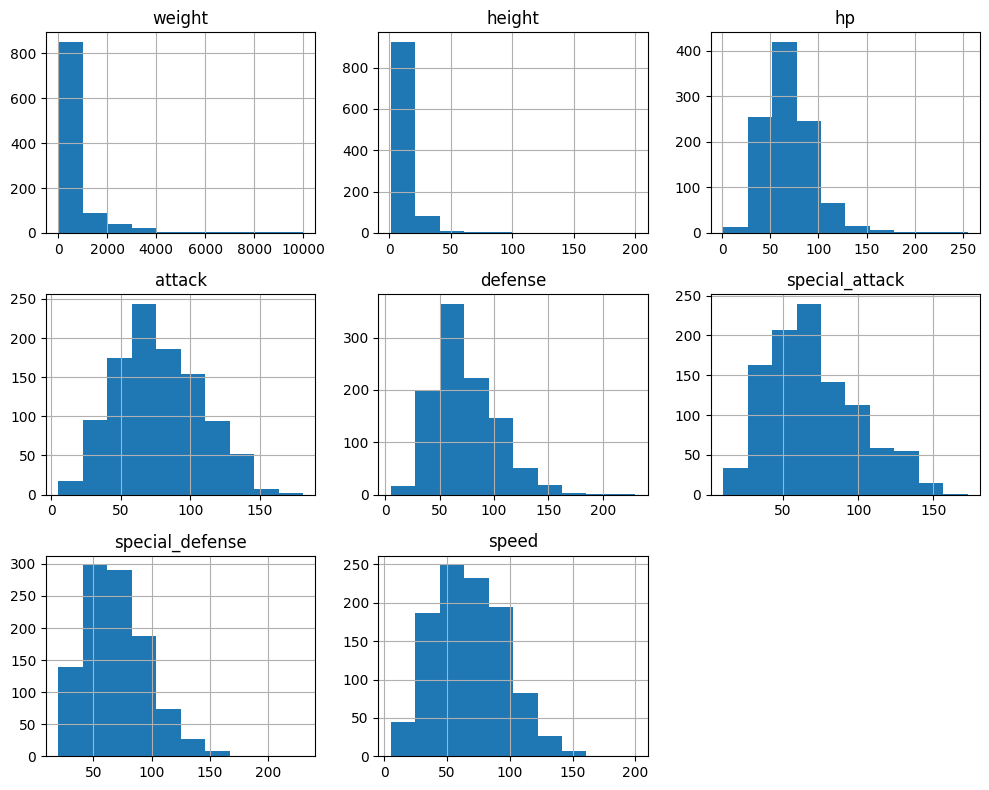

In [65]:
import matplotlib.pyplot as plt
# Create subplots for each column except for id, name and type columns
type_columns = [col for col in df.columns if col.startswith('type_')]
df.drop(['id', 'name'] + type_columns ,axis = 1).hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Through distribution analysis, we found most of the weight and height is severely left skewed. There are a few pokemons with extremely high weight and height. The stats are also a bit skewed, but not much.

Next, we will make boxplot to check whether there are outliers (extreme value).

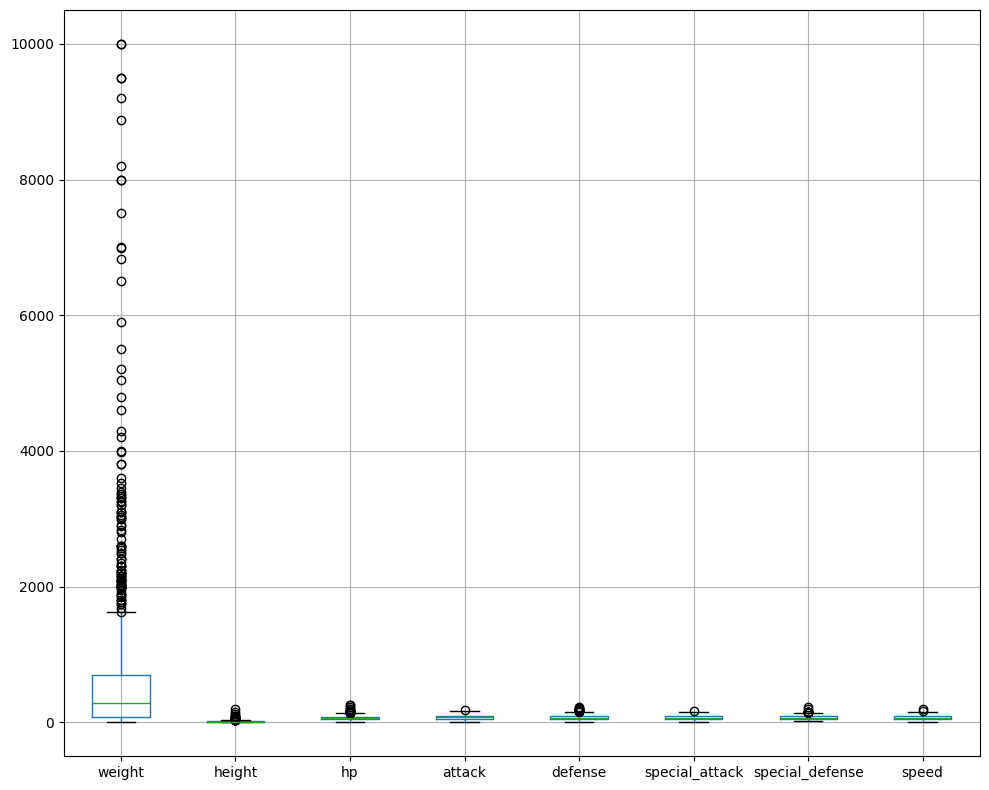

In [66]:
# Create subplots for each column except for id, name and type columns
df.drop(['id', 'name'] + type_columns, axis = 1).boxplot(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Here we found that weight has much bigger value than the others, so we will separate the visualisation.

<Axes: >

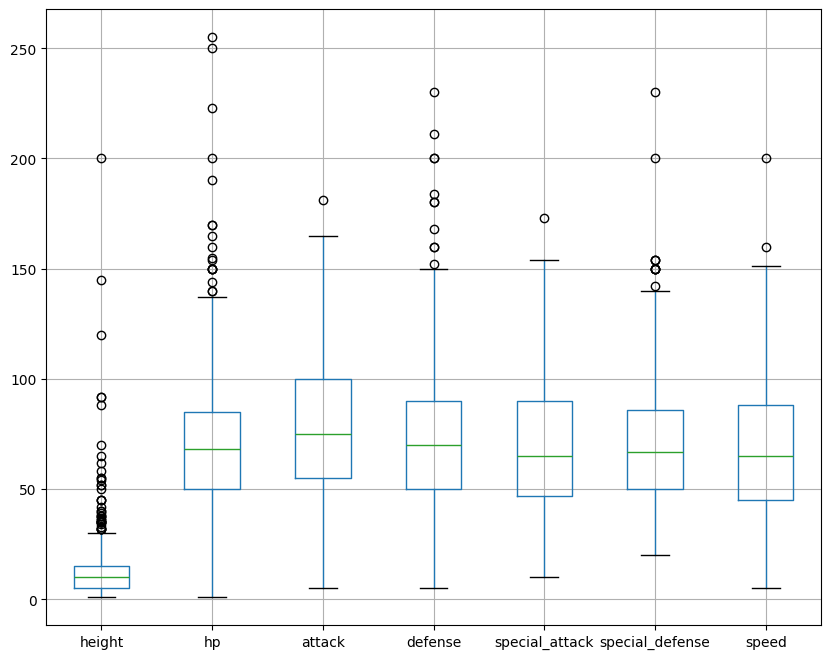

In [67]:
df.filter(['height','hp','attack','defense','special_attack','special_defense','speed'],axis = 1).boxplot(figsize=(10, 8))

#### 6.3.3 Check the correlation

It is always nice to understand the relationships between varibales. We can visualise relationship using correlation matrix or pairplot.

In [68]:
corr = df.drop(['id', 'name'] + type_columns, axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,weight,height,hp,attack,defense,special_attack,special_defense,speed
weight,1.00,0.63,0.48,0.40,0.45,0.18,0.26,0.04
height,0.63,1.00,0.48,0.38,0.35,0.32,0.28,0.20
hp,0.48,0.48,1.00,0.48,0.30,0.36,0.37,0.18
attack,0.40,0.38,0.48,1.00,0.47,0.28,0.23,0.35
defense,0.45,0.35,0.30,0.47,1.00,0.21,0.50,0.01
special_attack,0.18,0.32,0.36,0.28,0.21,1.00,0.49,0.42
special_defense,0.26,0.28,0.37,0.23,0.50,0.49,1.00,0.21
speed,0.04,0.20,0.18,0.35,0.01,0.42,0.21,1.00


Through the above correlation matrix, first we can see height and weight are slightly correlated with each other. Regarding stats, they are not very correlated with each other much. Hit point has strongest relationship with height, weight and attack. special-attack and special-defense are also slightly correlated. Speed has the strongest correlation with attack and special-attack. Defense is also most correlated with attack. Basically, we can see attack is quite important factor which can reflect some other stats like speed and defense at some points.

Optionally, we can also visualise the relationship and distribution using pairplot of all variables, but it could take long time whenwe have lots of columns.

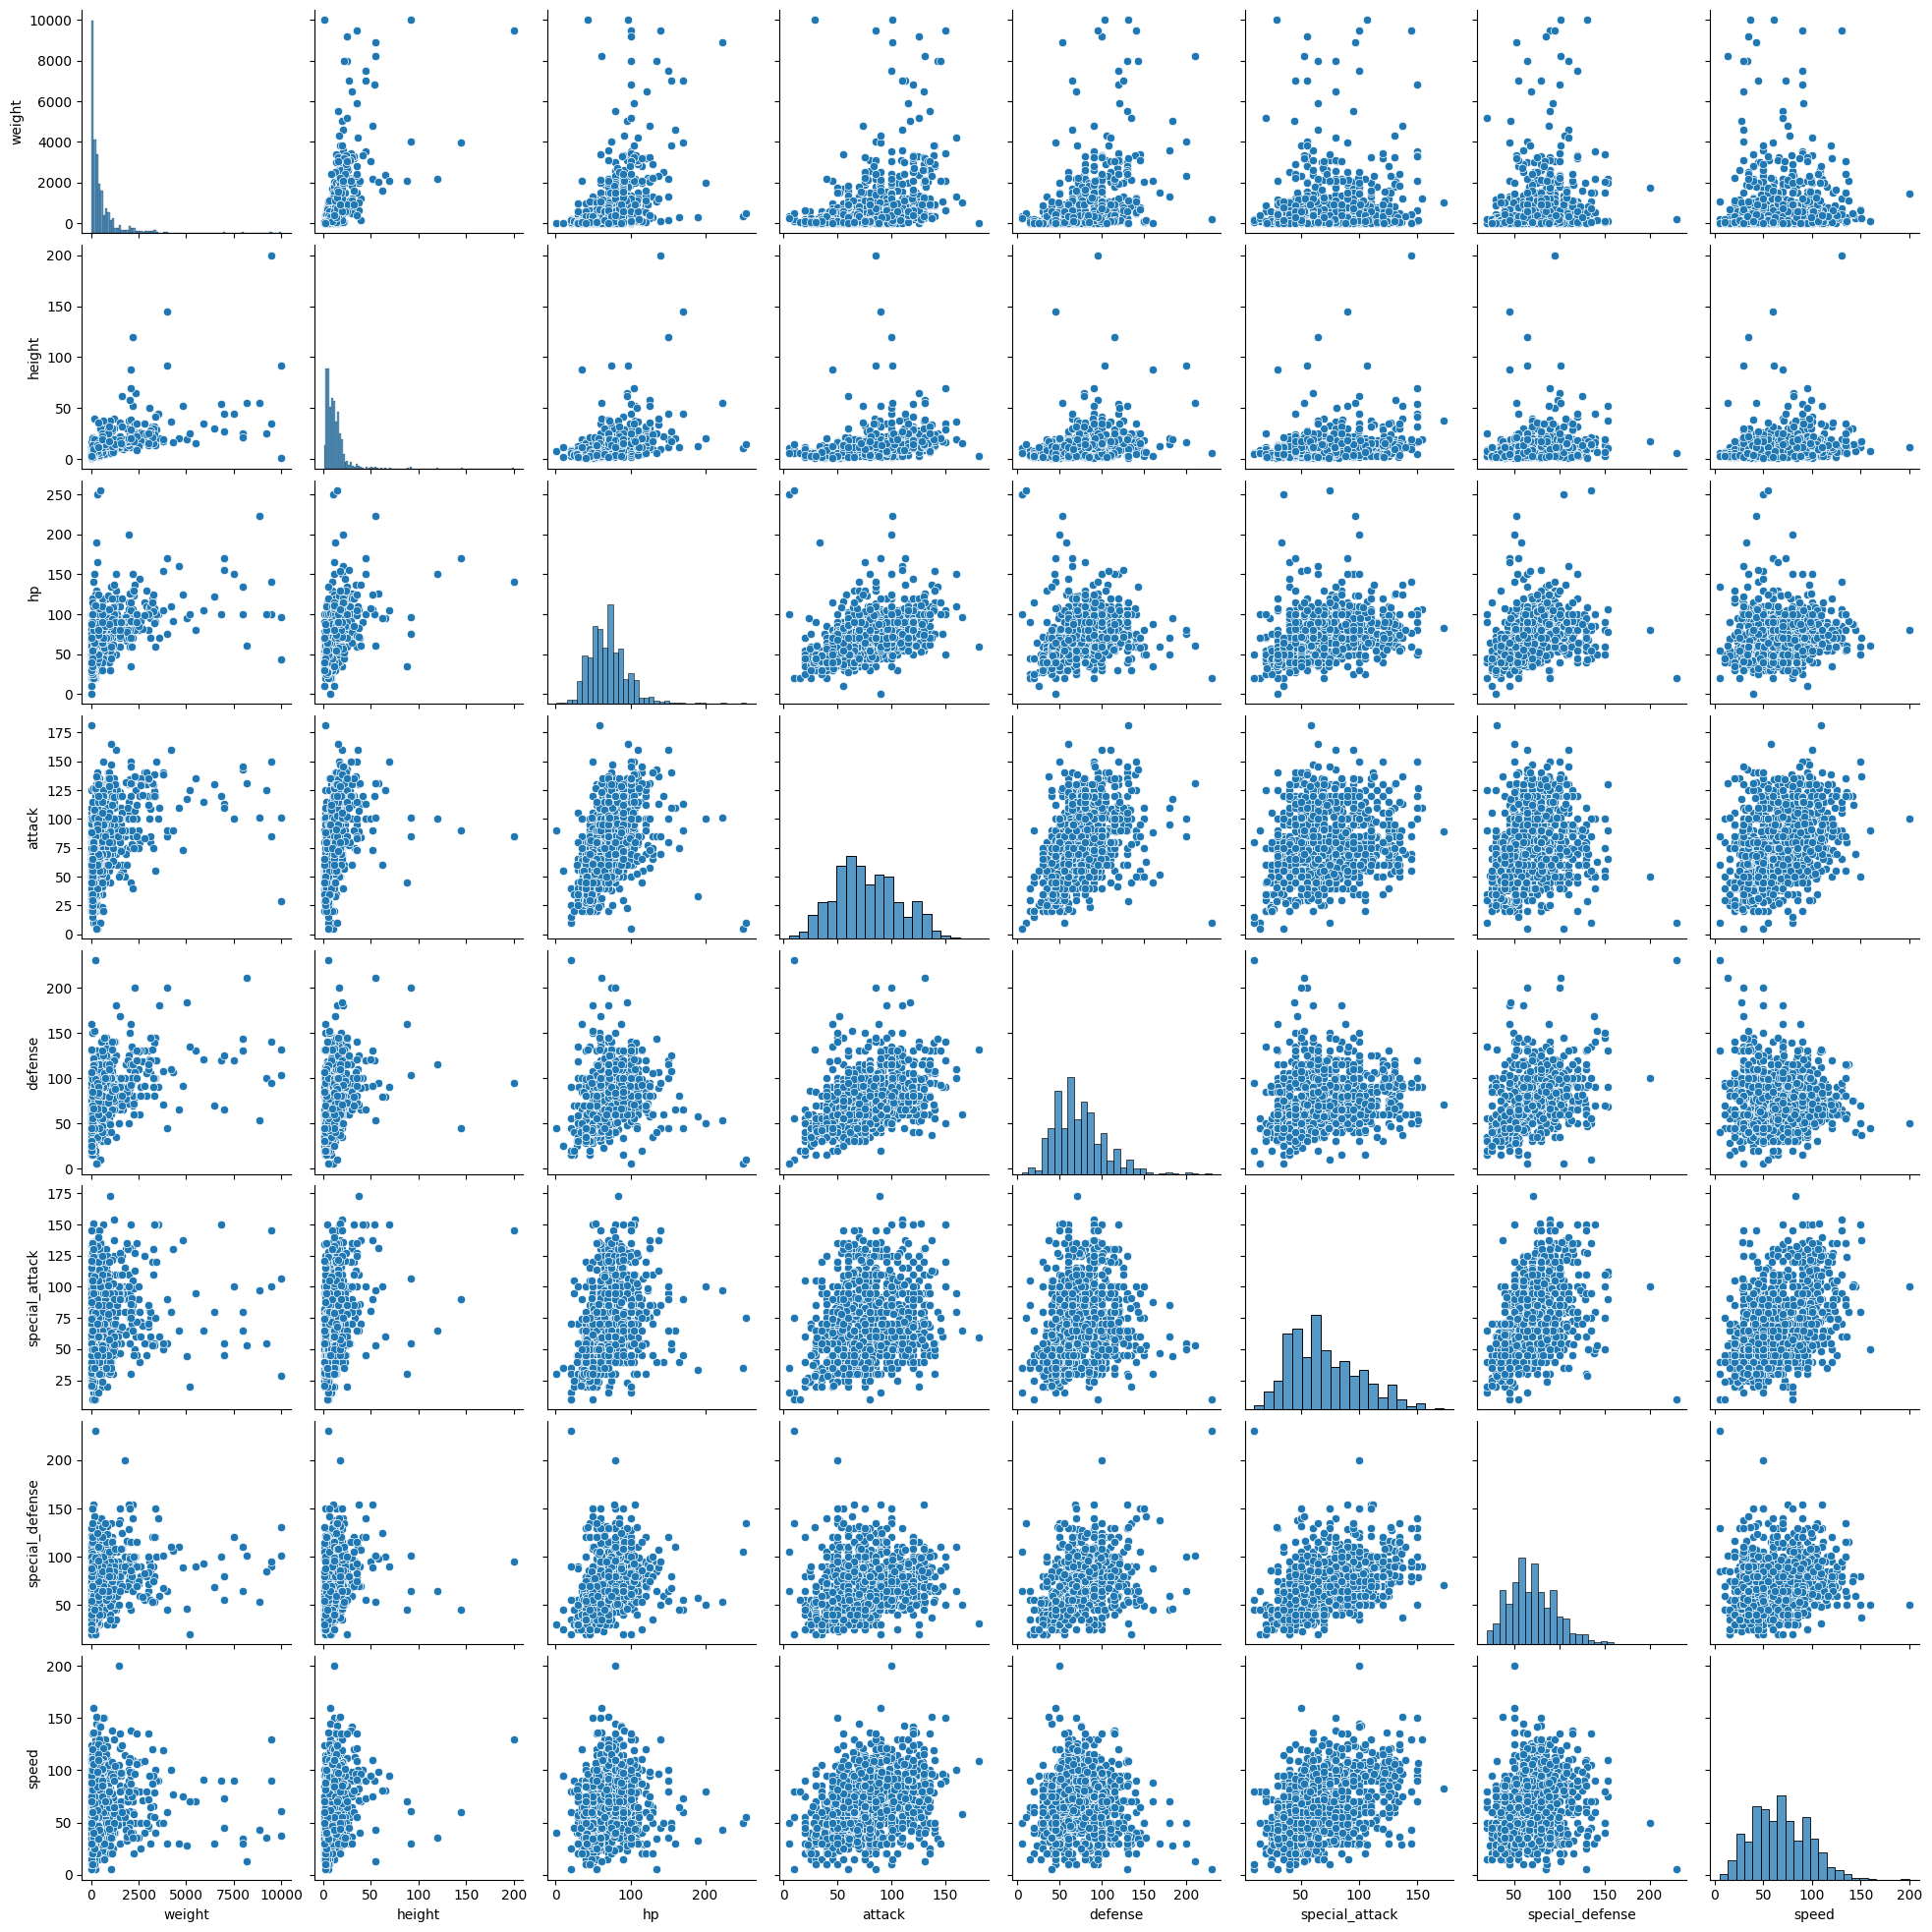

In [69]:
import seaborn as sns
sns.pairplot(df.drop(['id', 'name'] + type_columns, axis = 1))

#### 6.3.4 Variate analysis

Here we can check the top 10 heaviest and highest pokemons.

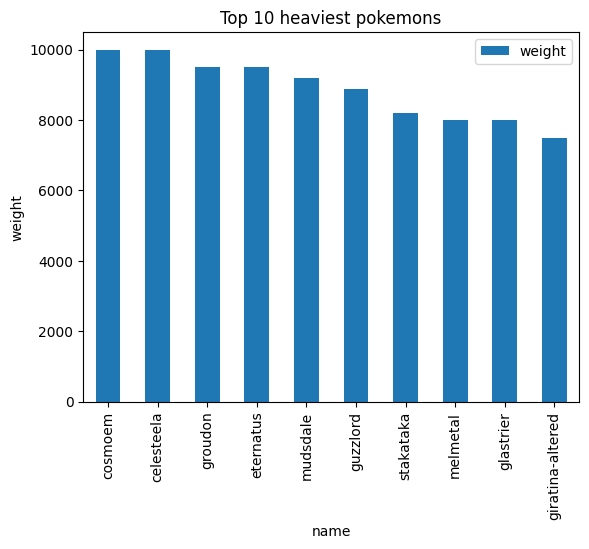

In [70]:
# return top 10 pokemons by weight
df.sort_values(by='weight',ascending = False)[:10].plot(x='name',y='weight',kind='bar')
plt.xlabel('name')
plt.ylabel('weight')
plt.title('Top 10 heaviest pokemons')
plt.show()


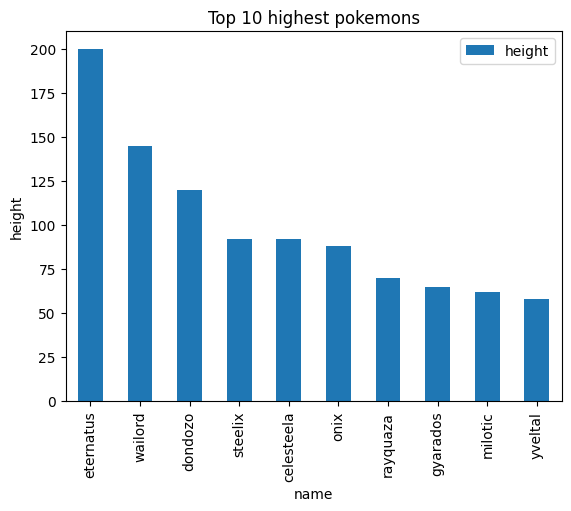

In [72]:
# return top 10 pokemons by height
df.sort_values(by='height',ascending = False)[:10].plot(x='name',y='height',kind='bar')
plt.xlabel('name')
plt.ylabel('height')
plt.title('Top 10 highest pokemons')
plt.show()

Here we can take a look at the distribution of different types, to understand what the most common types in this dataset of pokemon.

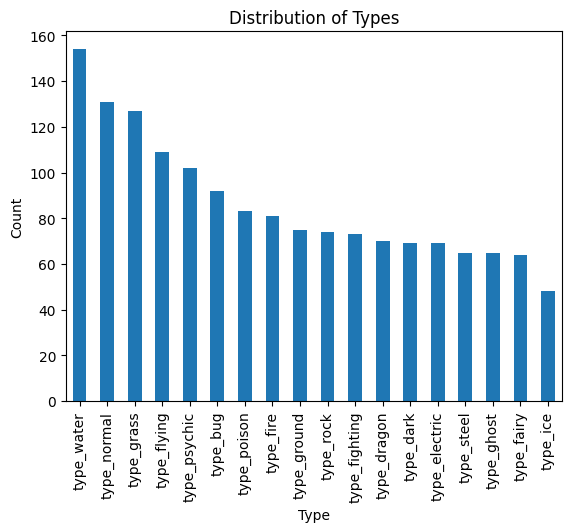

In [73]:
# Create a bar chart to show distribution of types with sorting
type_col = [col for col in df.columns if col.startswith('type_')]

df[type_col].sum().sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Types')
plt.show()

Water type seems the most common type for pokemon, followed by normal, grass and flying types.

You can explore more of the data if you want with visualisation. Of course, once data is cleaned you can also use visualisation tool such as Tableau to do visual analysis easily.

### 6.4 Modelling

#### Clustering

As mentioned above, the main complaint from the players is that they saw too many similar creatures and find the game boring in the end. In this scenario, we can try clustering to group the pokemons and then we can place different types of pokemons from different clusters, so that the players will experience more fun by seeing different creatures.

Our thought is to build clustering model based on stats and then check the most common types in each cluster.

There are different types of clustering algorithms, such as centroid-based clustering, density-based clustering, hierarchical clustering. To decide what clustering to use, we need to check how our data looks like.

Since we have multiple variables, we will reduce the data into two dimensions and then visualise the data in 2D chart.

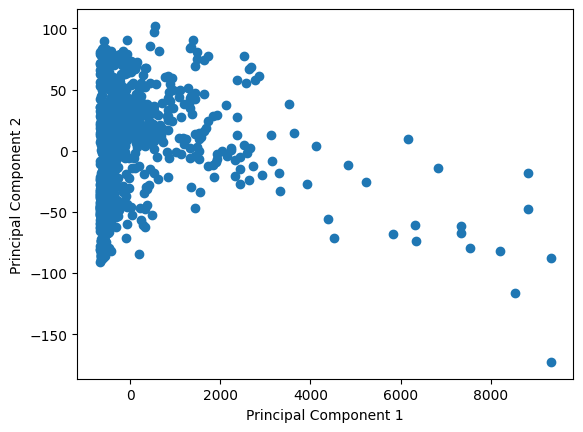

In [74]:
# create a dataframe with the variable we would like to use for clustering
data = df.drop(['id', 'name'] + type_columns ,axis = 1)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# We reduce the data into 2 features using PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

K-means could be a reasonable starting point for clustering this data give the shape of the data. But there are obviously some outliers that might impact the modelling. We can go back to the previous visualisation and know which column are having more outliers and we can what columns to include. And the scaling can be crucial given that some columns are with larger scale of data.

In [75]:
# Here we scale the data using min max scaler (normalisation)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_df = pd.DataFrame(scaler.transform(data),columns= data.columns)
scaled_df.head()

,weight,height,hp,attack,defense,special_attack,special_defense,speed
0,0.006801,0.030151,0.173228,0.250000,0.195556,0.337423,0.214286,0.205128
1,0.012903,0.045226,0.232283,0.323864,0.257778,0.429448,0.285714,0.282051
2,0.099920,0.095477,0.311024,0.437500,0.346667,0.552147,0.380952,0.384615
3,0.008402,0.025126,0.149606,0.267045,0.168889,0.306748,0.142857,0.307692
4,0.018904,0.050251,0.224409,0.335227,0.235556,0.429448,0.214286,0.384615


Before building clustering model, we will need to install the required libraries.

In [76]:
"""
the KElbowVisualizer from yellowbrick is a tool to implements the “elbow” method to help data scientists
select the optimal number of clusters by fitting the model with a range of values for K (K is the number of clusters).
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
"""

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

"""
distortion: mean sum of squared distances to centers, i.e.the sum of the square distance between points in a cluster and the cluster centroid.
silhouette: mean ratio of intra-cluster and nearest-cluster distance. The value of the Silhouette score ranges from -1 to 1.
            silhouette_score = 1: Points are perfectly assigned in a cluster and clusters are easily distinguishable.
            silhouette_score = 0: Clusters are overlapping.
            silhouette_score = -1: Points are wrongly assigned in a cluster.
"""

'\ndistortion: mean sum of squared distances to centers, i.e.the sum of the square distance between points in a cluster and the cluster centroid.\nsilhouette: mean ratio of intra-cluster and nearest-cluster distance. The value of the Silhouette score ranges from -1 to 1.\n            silhouette_score = 1: Points are perfectly assigned in a cluster and clusters are easily distinguishable.\n            silhouette_score = 0: Clusters are overlapping.\n            silhouette_score = -1: Points are wrongly assigned in a cluster.\n'

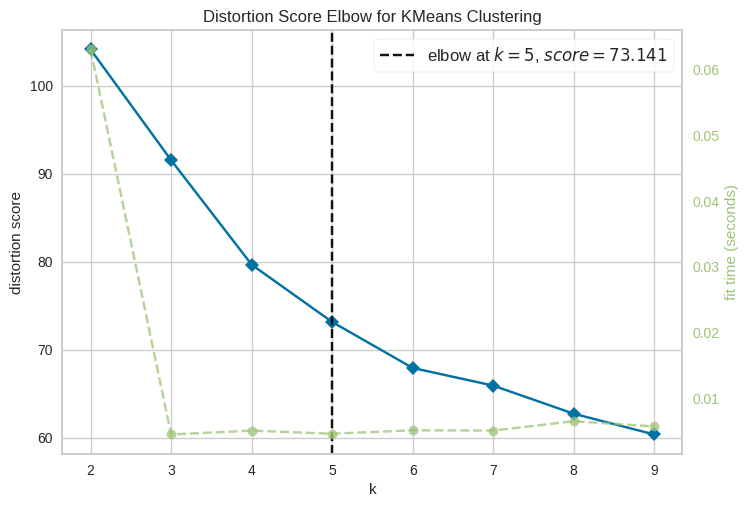

In [77]:
"""
If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication
that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.
"""

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(scaled_df)
visualizer.show()
plt.show()

from the below graph, we can see the optimal number of cluster is 5

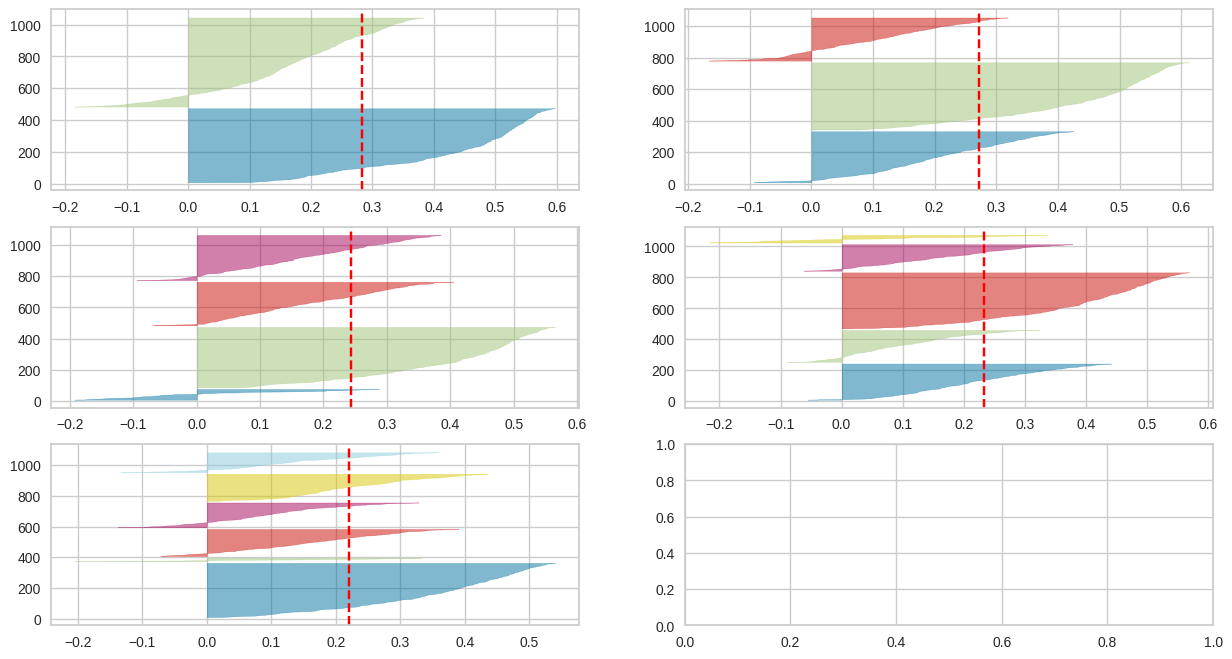

In [78]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df)

From the above graph, we can see the model is not performing very well in general. the silhouette score is very low and some items are wrongly assigned. Combined both methods elbow visualizer and silhouette visualizer, we probably would consider to drop some columns and then check the model performance again.

If we go back to check the EDA results, we will see the columns height and weight are with more outliers and K-means model is very sensitive with outliers. Thus, in the next modelling session, we will create another data with only stats data and then evaluate the model.

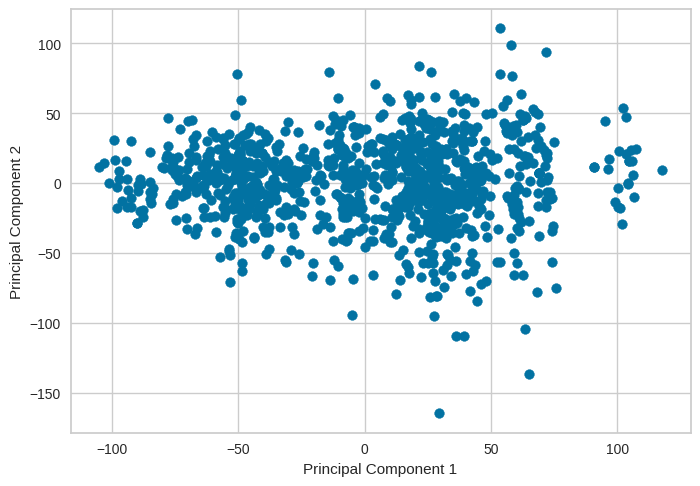

In [79]:
# create a dataframe with the variable we would like to use for clustering
data1 = df.drop(['id', 'name', 'height', 'weight'] + type_columns ,axis = 1)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with multiple columns
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data1)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [80]:
# Here we scale the data using min max scaler (normalisation)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data1)
scaled_df1 = pd.DataFrame(scaler.transform(data1),columns= data1.columns)
scaled_df1.head()

,hp,attack,defense,special_attack,special_defense,speed
0,0.173228,0.250000,0.195556,0.337423,0.214286,0.205128
1,0.232283,0.323864,0.257778,0.429448,0.285714,0.282051
2,0.311024,0.437500,0.346667,0.552147,0.380952,0.384615
3,0.149606,0.267045,0.168889,0.306748,0.142857,0.307692
4,0.224409,0.335227,0.235556,0.429448,0.214286,0.384615


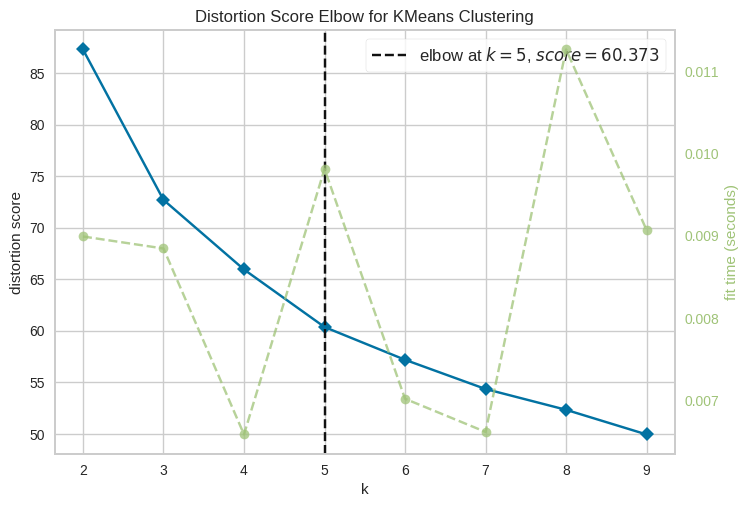

In [81]:
"""
If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication
that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.
"""

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(scaled_df1)
visualizer.show()
plt.show()

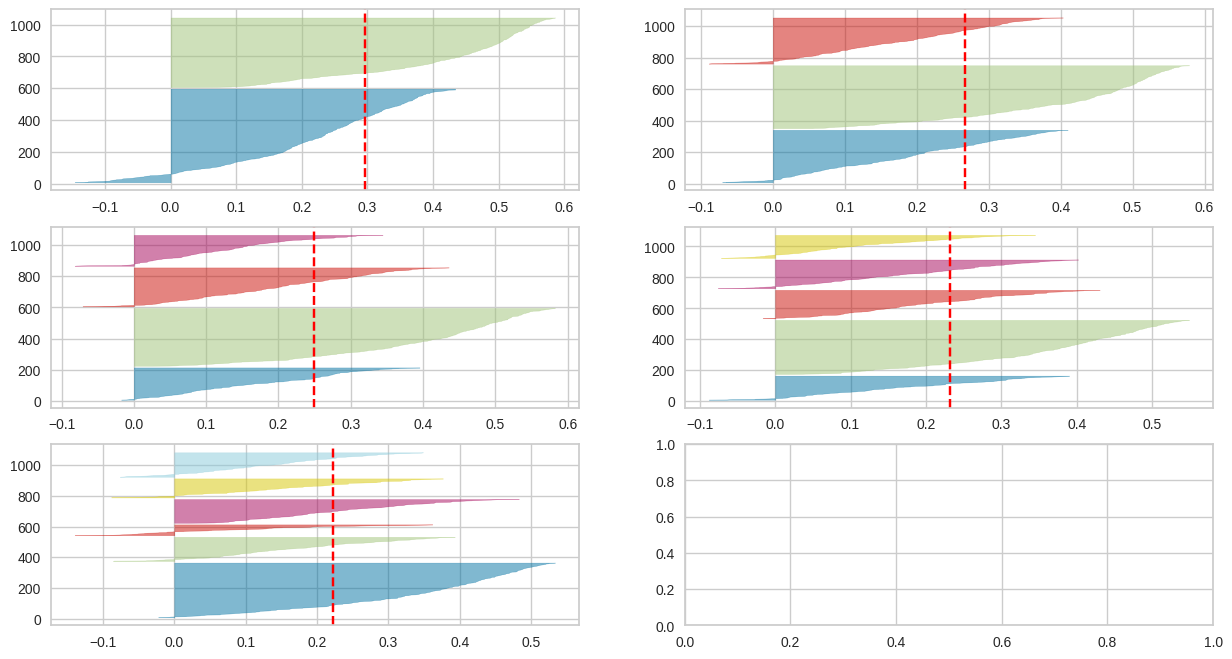

In [82]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df1)

The evaluation results still look not ideal. But this time we have less wrongly assigned items and the overall evaluation metrics look better. We can continue using this model (n_cluster = 4)to segment the pokemons.

Before checking cluster of each pokemon, we can visualise the clusters with PCA first.

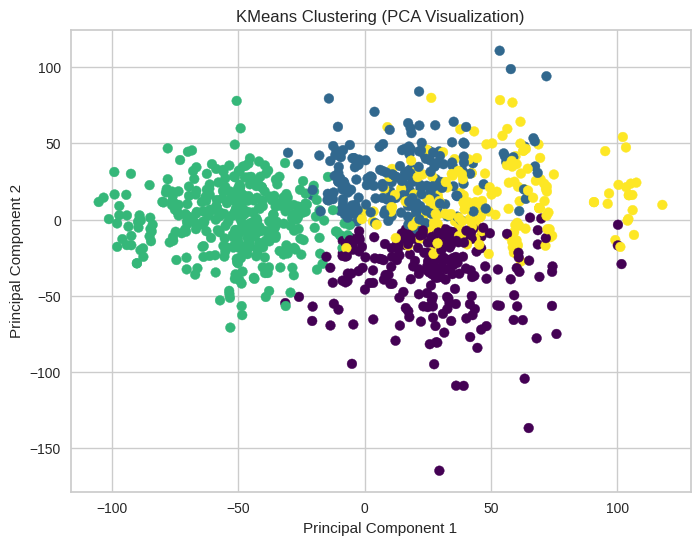

In [83]:
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=4, random_state=3).fit(data1)
clusters = kmeans_model.fit_predict(data1)

# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data1)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (PCA Visualization)')
plt.show()

Basically, some pokemons are distinctive enough (purple ones) but there are some overlaps in yellow and blue groups. Next we will check more details.

In [84]:
# here we add a column to the original dataframe to show predicted cluster for each pokemon
df['Cluster'] = kmeans_model.predict(data1)
df.head()

,id,name,weight,height,hp,attack,defense,special_attack,special_defense,speed,...,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water,Cluster
0,1,bulbasaur,69,7,45,49,49,65,65,45,...,1,0,0,0,1,0,0,0,0,2
1,2,ivysaur,130,10,60,62,63,80,80,60,...,1,0,0,0,1,0,0,0,0,2
2,3,venusaur,1000,20,80,82,83,100,100,80,...,1,0,0,0,1,0,0,0,0,3
3,4,charmander,85,6,39,52,43,60,50,65,...,0,0,0,0,0,0,0,0,0,2
4,5,charmeleon,190,11,58,64,58,80,65,80,...,0,0,0,0,0,0,0,0,0,1


In [85]:
# check the number of users allocated to each cluster
print(df['Cluster'].value_counts())

Cluster
2    376
0    231
3    214
1    204
Name: count, dtype: int64


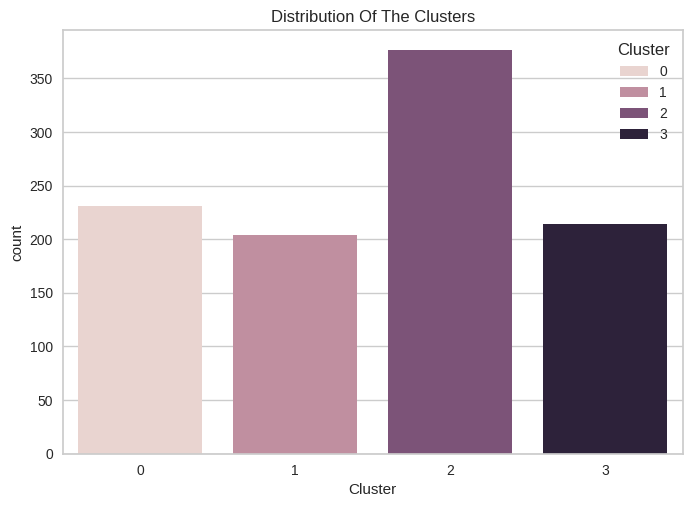

In [86]:
import seaborn as sns

# visualise the number of users allocated to each cluster
pl = sns.countplot(x=df["Cluster"],hue = df["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [87]:
# return a table with mean of each feature for each cluster, so we can summarise the characteristics of each cluster
Clusters = df.drop(['id', 'name', 'height', 'weight'] + type_columns ,axis = 1).groupby('Cluster', as_index=False).agg("mean")
Clusters

,Cluster,hp,attack,defense,special_attack,special_defense,speed
0,0,84.017316,100.787879,104.753247,62.194805,80.666667,56.770563
1,1,70.205882,89.014706,64.77451,78.078431,68.279412,98.632353
2,2,49.933511,53.132979,51.175532,48.476064,49.675532,49.478723
3,3,90.813084,84.303738,82.551402,108.929907,96.82243,79.565421


Except for training model in Python, you can also connect with BigQuery to create ML model and make predictions. Google BigQuery is integrated with ML capability and it is quite powerful for training different types of ML models. Next you are showed how to train the same K-means model in BigQuery.

In [92]:
# Replace with the number of clusters you want
num_clusters = 4

# Below query is used to create a model using the proccessed data we have saved back to BigQuery under the same dataset
# We name our model as 'pokemon_kmeans_model'
# In OPTIONS() we define the model type and the parameter - number of clusters
# With AS SELECT to select relevant data from the target table for model training
# After creating the model, second part of SELECT query is used to make predictions on the same data.
# Each row in the data will be then assigned to a cluster.

dataset_name = 'andy_pokemen_dataset'
model_name = 'pokemon_kmeans_model'
new_table_name = 'new_table_name'

query = f"""
CREATE MODEL `{project_id}.{dataset_name}.{model_name}`
OPTIONS(model_type='kmeans', num_clusters={num_clusters}) AS
SELECT
    hp, attack, defense, special_attack, special_defense, speed
FROM
    `{project_id}.{dataset_name}.{new_table_name}`;

SELECT * FROM ML.PREDICT(MODEL `{project_id}.{dataset_name}.{model_name}`, (
    SELECT
        hp, attack, defense, special_attack, special_defense, speed
    FROM
        `{project_id}.{dataset_name}.{new_table_name}`
));
"""

# Execute the query and print the results
client = bigquery.Client(project=project_id)
query_job = client.query(query)
results = query_job.result()

for row in results:
  print(row)


Row((2, [{'CENTROID_ID': 2, 'DISTANCE': 1.4735625068062634}, {'CENTROID_ID': 4, 'DISTANCE': 1.8095584838772734}, {'CENTROID_ID': 1, 'DISTANCE': 1.9348019517255528}, {'CENTROID_ID': 3, 'DISTANCE': 2.634025243987996}], 80, 60, 90, 60, 70, 50), {'CENTROID_ID': 0, 'NEAREST_CENTROIDS_DISTANCE': 1, 'hp': 2, 'attack': 3, 'defense': 4, 'special_attack': 5, 'special_defense': 6, 'speed': 7})
Row((4, [{'CENTROID_ID': 4, 'DISTANCE': 0.7360192109695018}, {'CENTROID_ID': 3, 'DISTANCE': 2.2417565748905317}, {'CENTROID_ID': 2, 'DISTANCE': 2.424716924631742}, {'CENTROID_ID': 1, 'DISTANCE': 3.1380258818743254}], 80, 120, 90, 60, 70, 85), {'CENTROID_ID': 0, 'NEAREST_CENTROIDS_DISTANCE': 1, 'hp': 2, 'attack': 3, 'defense': 4, 'special_attack': 5, 'special_defense': 6, 'speed': 7})
Row((4, [{'CENTROID_ID': 4, 'DISTANCE': 1.4134533203996924}, {'CENTROID_ID': 2, 'DISTANCE': 2.7727664522963695}, {'CENTROID_ID': 3, 'DISTANCE': 2.7891997767949688}, {'CENTROID_ID': 1, 'DISTANCE': 2.8613238455881436}], 60, 130, 

In [93]:
query_job.to_dataframe()

,CENTROID_ID,NEAREST_CENTROIDS_DISTANCE,hp,attack,defense,special_attack,special_defense,speed
0,2,"[{'CENTROID_ID': 2, 'DISTANCE': 1.473562506806...",80,60,90,60,70,50
1,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.736019210969...",80,120,90,60,70,85
2,4,"[{'CENTROID_ID': 4, 'DISTANCE': 1.413453320399...",60,130,80,60,60,70
3,3,"[{'CENTROID_ID': 3, 'DISTANCE': 1.688007746554...",60,105,60,120,60,105
4,4,"[{'CENTROID_ID': 4, 'DISTANCE': 1.350850455979...",80,100,70,50,60,45
...,...,...,...,...,...,...,...,...
1020,4,"[{'CENTROID_ID': 4, 'DISTANCE': 1.779785087347...",75,105,75,105,75,45
1021,3,"[{'CENTROID_ID': 3, 'DISTANCE': 1.851744416221...",50,50,77,95,77,91
1022,2,"[{'CENTROID_ID': 2, 'DISTANCE': 7.554586717335...",20,10,230,10,230,5
1023,1,"[{'CENTROID_ID': 1, 'DISTANCE': 1.204476864095...",70,45,48,60,65,35


You can run further codes to check the means of each feature and evaluation results and etc. But it is too complicated to demonstrate here. You are recommended to go back to Google Cloud console - BigQuery and check the model result there. It is integrated with simple interface and visualisation, whcih is easy to understand.

By building the clustering model and exploring the chracteristics of pokemons within each clusters, I think we found some different groups of pokemons.

Next step is to test our results in the game. For example, we can start new placement strategies based on this model result, and then see whether the stay rate is improving. If not, we will collect more data to better modelling, and of course we can change the algorithms and rebuild our model. As we mentioned, the algorithm we selected might not be the best one and this is just a pilot project, we still have room to improve.

Model, tune, test, tune, test...This is usually how we build machine learning model.

Until here, you have experienced the full data analytics lifecyle in Google Cloud. Pretty cool, right? Hope you enjoy this lab.

You don't have to run all the code every time. You can always jump to specific section and use the code. For example, if you already have data in google cloud storage, then you can just load the data into BigQuery directly with code we show in 4.9. Or if you have a table in BigQuery already and you want to make query, then you can jump to 5.2 to check how to connect with BigQuery and query data.

Feel free to build your own project!

## **Thank you!**